Exercise 4 - Polynomial Regression
========

Sometimes our data doesn't have a linear relationship, but we still want to predict an outcome.

Suppose we want to predict how satisfied people might be with a piece of fruit, we would expect satisfaction would be low if the fruit was under ripened or over ripened. Satisfaction would be high in between underripened and overripened.

This is not something linear regression will help us with, so we can turn to polynomial regression to help us make predictions for these more complex non-linear relationships!

Step 1
------

In this exercise we will look at a dataset analysing internet traffic over the course of the day. Observations were made every hour over the course of several days. Suppose we want to predict the level of traffic we might see at any time during the day, how might we do this?

Let's start by opening up our data and having a look at it.

#### In the cell below replace the text `<printDataHere>` with `print(dataset.head())`, and __run the code__ to see the data.

In [1]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = "DejaVu Sans"
graph.rcParams["font.size"] = "12"
graph.rcParams['image.cmap'] = 'rainbow'
graph.rcParams['axes.facecolor'] = 'white'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('traffic_by_hour.csv')

###
# BELOW, REPLACE <printDataHere> WITH print(dataset.head()) TO PREVIEW THE DATASET ---###
###
print(dataset.head())
###

          00         01         02  ...         21         22         23
0  43.606554  24.714152   9.302911  ...  64.096617  59.582208  42.819702
1  44.584835  19.604348   9.480832  ...  61.359132  50.287926  40.383544
2  33.208561  29.584181  27.207633  ...  61.140163  61.446353  58.811576
3  35.026655  20.367550  21.445285  ...  60.139054  61.639772  44.670988
4  40.163194  19.936328  18.066480  ...  51.909886  61.674395  46.727170

[5 rows x 24 columns]


Step 2
-----

Next we're going to flip the data with the transpose method - our rows will become columns and our columns will become rows. Transpose is commonly used to reshape data so we can use it. Let's try it out.

#### In the cell below find the text `<addCallToTranspose>` and replace it with `transpose`

In [2]:
### 
# REPLACE THE <addCallToTranspose> BELOW WITH transpose
###
dataset_T = np.transpose(dataset)
###

print(dataset_T)

            0          1          2          3          4          5
00  43.606554  44.584835  33.208561  35.026655  40.163194  49.169391
01  24.714152  19.604348  29.584181  20.367550  19.936328  24.455188
02   9.302911   9.480832  27.207633  21.445285  18.066480  12.391360
03   3.694417  13.476905  11.243233   7.449592  12.109940  10.705337
04   9.324995  14.465224  12.229805   2.232115  10.878539   6.511395
05   9.837653   6.014083   5.072605   8.104623   9.766027  21.785345
06   7.960157  22.679671   6.111838   9.095805  19.504761  19.257321
07  21.292098  18.192898  26.176792  19.499463  10.313875  23.273782
08  27.714126  28.783762  35.246483  37.689567  28.509128  29.661006
09  46.709211  40.113972  38.220432  33.907093  30.809746  34.608582
10  39.111999  46.149334  30.902951  31.018349  36.326509  38.679585
11  47.428745  43.753611  50.462422  43.379814  45.893941  48.254502
12  43.459394  45.312618  41.865849  40.330625  31.512743  44.585404
13  39.046579  34.654569  43.62873

Now lets visualize the data. 

#### Replace the text `<addSampleHere>` with `sample` and then __run the code__.

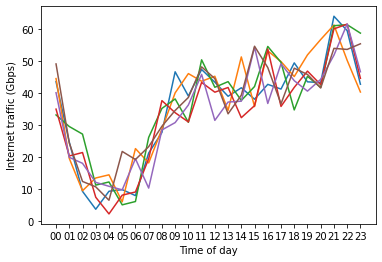

In [3]:
# Let's visualise the data!

###
# REPLACE <addSampleHere> BELOW WITH sample
###
for sample in range(0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[sample])
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

Step 3
-----

This all looks a bit busy, let's see if we can draw out a clearer pattern by taking the __average values__ for each hour.

#### In the cell below find all occurances of `<replaceWithHour>` and replace them with `hour` and then __run the code__.

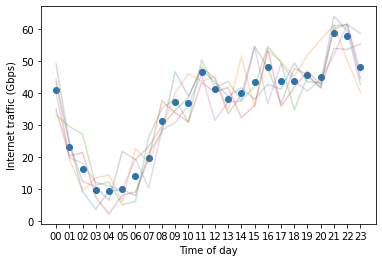

In [4]:
# We want to look at the mean values for each hour.

hours = dataset.columns.values

###
# REPLACE THE <replaceWithHour>'s BELOW WITH hour
###
train_Y = [dataset[hour].mean() for hour in hours]  # This will be our outcome we measure (label) - amount of internet traffic
train_X = np.transpose([int(hour) for hour in hours]) # This is our feature - time of day
###

# This makes our graph, don't edit!
graph.scatter(train_X, train_Y)
for sample in range(0,dataset_T.shape[1]):
    graph.plot(hours, dataset_T[sample], alpha=0.25)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

This alone could help us make a prediction if we wanted to know the expected traffic exactly on the hour.

But, we'll need to be a bit more clever if we want to make a __good__ prediction of times in between.

Step 4
------

Let's use the midpoints in between the hours to analyse the relationship between the __time of day__ and the __amount of internet traffic__.

Numpy's `polyfit(x,y,d)` function allows us to do polynomial regression, or more precisely least squares polynomial fit.

We specify a __feature $x$ (time of day)__, our __label $y$ (the amount of traffic)__, and the __degree $d$ of the polynomial (how curvy the line is)__.

#### In the cell below find the text `<replaceWithDegree>`, replace it with the value `1` then __run the code__.

In [5]:
# Polynomials of degree 1 are linear!
# Lets include this one just for comparison

###
# REPLACE THE <replaceWithDegree> BELOW WITH 1
###
poly_1 = np.polyfit(train_X, train_Y, 1)
###

Let's also compare a few higher-degree polynomials.

#### Replace the `<replaceWithDegree>`'s below with numbers, as directed in the comments.

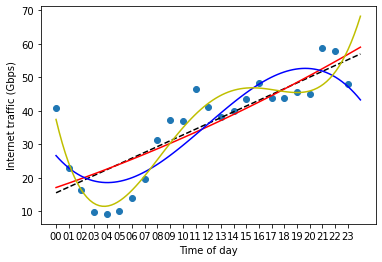

In [6]:
###
# REPLACE THE <replaceWithDegree>'s BELOW WITH 2, 3, AND THEN 4
###
poly_2 = np.polyfit(train_X, train_Y, 2)
poly_3 = np.polyfit(train_X, train_Y, 3)
poly_4 = np.polyfit(train_X, train_Y, 4)
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 2
graph.plot(xp, np.polyval(poly_2, xp), 'r-')
# blue degree 3
graph.plot(xp, np.polyval(poly_3, xp), 'b-') 
# yellow degree 4
graph.plot(xp, np.polyval(poly_4, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

None of these polynomials do a great job of generalising the data. Let's try a few more.

#### Follow the instructions in the comments to replace the `<replaceWithDegree>`'s and then __run the code__.

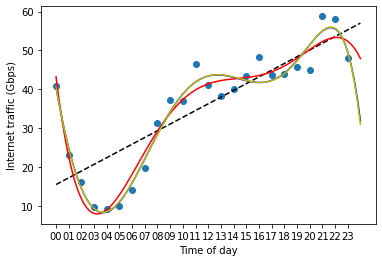

In [7]:
###
# REPLACE THE <replaceWithDegree>'s 5, 6, AND 7
###
poly_5 = np.polyfit(train_X, train_Y, 5)
poly_6 = np.polyfit(train_X, train_Y, 6)
poly_7 = np.polyfit(train_X, train_Y, 7)
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 5
graph.plot(xp, np.polyval(poly_5, xp), 'r-') 
# blue degree 6
graph.plot(xp, np.polyval(poly_6, xp), 'b-') 
# yellow degree 7
graph.plot(xp, np.polyval(poly_7, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

It looks like the 5th and 6th degree polynomials have an identical curve. This looks like a good curve to use.

We could perhaps use an even higher degree polynomial to fit it even more tightly, but we don't want to overfit the curve, since we want just a generalisation of the relationship.

Let's see how our degree 6 polynomial compares to the real data.

#### Replace the text `<replaceWithPoly6>` with `poly_6` and __run the code__.

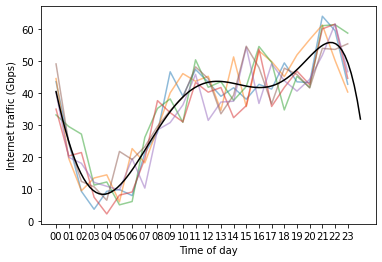

In [8]:
for row in range(0,dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[row], alpha = 0.5)

###
# REPLACE <replaceWithPoly6> BELOW WITH poly_6 - THE POLYNOMIAL WE WISH TO VISUALIZE
###    
graph.plot(xp, np.polyval(poly_6, xp), 'k-')
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

Step 5
------

Now let's try using this model to make a prediction for a time between 00 and 24.

#### In the cell below follow the instructions in the code to replace `<replaceWithTime>` and `<replaceWithPoly6>` then __run the code__.

at t=12.5, predicted internet traffic is 43.70388389312018 Gbps


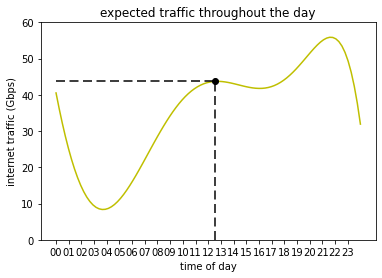

In [9]:
###
# REPLACE <replaceWithTime> BELOW WITH 12.5 (this represents the time 12:30)
###
time = 12.5
###

###
# REPLACE <replaceWithPoly6> BELOW WITH poly_6 SO WE CAN VISUALIZE THE 6TH DEGREE POLYNOMIAL MODEL
###
pred = np.polyval(poly_6, time)
###

print("at t=%s, predicted internet traffic is %s Gbps"%(time,pred))

# Now let's visualise it
graph.plot(xp, np.polyval(poly_6, xp), 'y-')

graph.plot(time, pred, 'ko') # result point
graph.plot(np.linspace(0, time, 2), np.full([2], pred), dashes=[6, 3], color='black') # dashed lines (to y-axis)
graph.plot(np.full([2], time), np.linspace(0, pred, 2), dashes=[6, 3], color='black') # dashed lines (to x-axis)

graph.xticks(train_X, dataset.columns.values)
graph.ylim(0, 60)
graph.title('expected traffic throughout the day')
graph.xlabel('time of day')
graph.ylabel('internet traffic (Gbps)')

graph.show()

Conclusion
-----

And there we have it! You have made a polynomial regression model and used it for analysis! This models gives us a prediction for the level of internet traffic we should expect to see at any given time of day.

You can go back to the course and either click __'Next Step'__ to start an optional step with tips on how to better work with AI models, or you can go to the next module where instead of predicting numbers we predict categories.